# TM351 Data management and analysis 


# Summer 2023 TMA & Project Notebook Template

## _Please complete the information below :_

### Branch: Kuwait 
### Student Name: Nibras Shami
### Student ID: 201099
### Section number: 101
### Instructor: Dr. Loai Shalabi 

`Place all your coding work for this question in the lab notebook template and your 300-word summary in the TMA word processing template.`

## Start by importing needed libraries

In [1]:
import matplotlib as plt
import pandas as pd
import pandas as pd
from pandas import DataFrame
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt

# Question 2 (*get to know your data*)

We need to import the dataset first so we can start observing and see more details on the data.

## Import Lung Cancer Survey data frame

In [2]:
data = pd.read_csv('Data/survey lung cancer.csv') ## Import the Dataset by using `read_csv()` method
df = pd.DataFrame(data) ## Create a DataFrame out of the data we have
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


`"The contents of the dataset with detailed description"`

### Let's Check the Data Type for the DataFrame we imported

In [3]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

### Check for missing values

In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

*Great!* No null or missing values in our dataset

### Let's get some general info about our data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## Question 3 (Project)

Research Question:<div style="color:red;">**How does Age relate to the likelihood of lung cancer diagnosis in individuals?**</div>

- **Aims**:

    a.	General Aim: To explore and understand the association between age and the likelihood of lung cancer diagnosis within a diverse population.

- **Objectives**:

    a.	Investigate the distribution of lung cancer diagnoses across different age groups.
    
    b.	Establish statistical correlations between age and the incidence of lung cancer within the dataset.
    
    c.	Determine the trend of lung cancer diagnosis concerning age, emphasizing any notable patterns or disparities.
    
    d.	Provide actionable insights into how age might influence lung cancer occurrences for potential healthcare interventions or targeted screenings.

<br />

We will start by Generating a *Bar Plot* to observe any potential patterns or correlations.

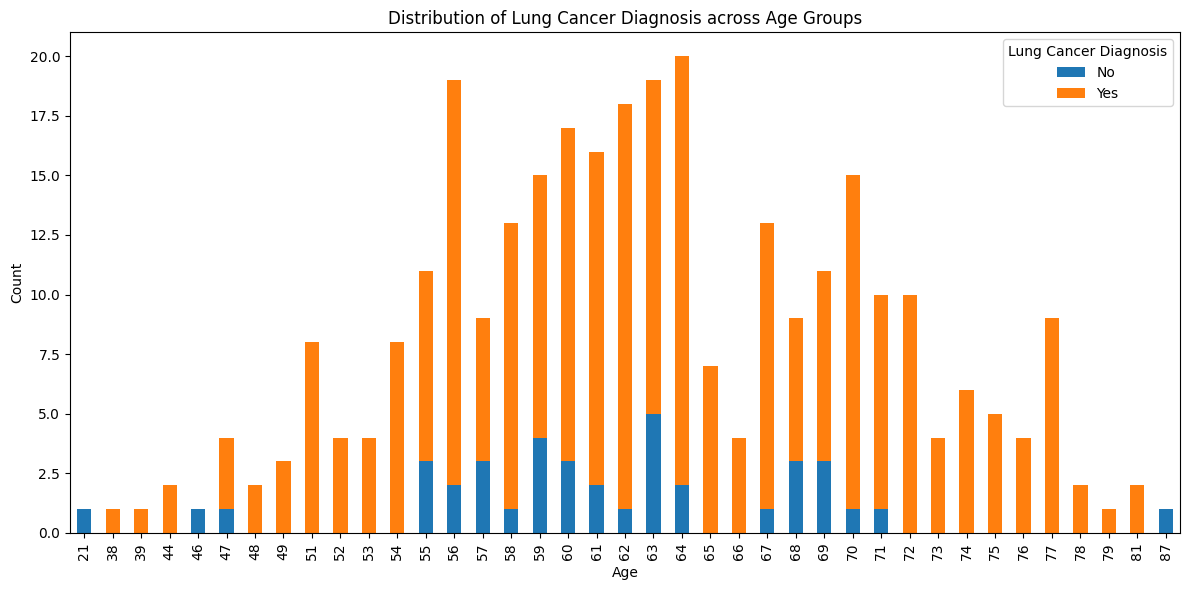

In [6]:
lung_cancer_count = data.groupby(['AGE', 'LUNG_CANCER']).size().unstack()
lung_cancer_count.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of Lung Cancer Diagnosis across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Lung Cancer Diagnosis', labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Filtering data for those diagnosed with lung cancer
lung_cancer_diagnosed = df[df['LUNG_CANCER'] == 'YES']

# Calculating mean, median, and mode of age for lung cancer diagnosed individuals
mean_age = lung_cancer_diagnosed['AGE'].mean()
median_age = lung_cancer_diagnosed['AGE'].median()
mode_age = lung_cancer_diagnosed['AGE'].mode().values[0]

print(f"Mean Age for Lung Cancer Diagnosed: {mean_age}")
print(f"Median Age for Lung Cancer Diagnosed: {median_age}")
print(f"Mode Age for Lung Cancer Diagnosed: {mode_age}")

Mean Age for Lung Cancer Diagnosed: 62.95185185185185
Median Age for Lung Cancer Diagnosed: 62.5
Mode Age for Lung Cancer Diagnosed: 64


### Histogram for age distribution with and without lung cancer

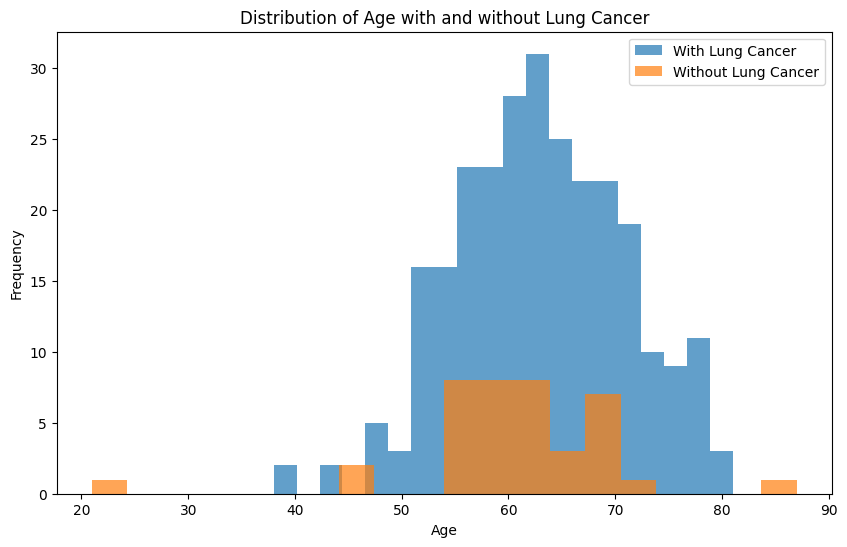

In [8]:
# Separate data for those with and without lung cancer
with_lung_cancer = df[df['LUNG_CANCER'] == 'YES']
without_lung_cancer = df[df['LUNG_CANCER'] == 'NO']

# Creating histograms for age distribution with and without lung cancer
plt.figure(figsize=(10, 6))

plt.hist(with_lung_cancer['AGE'], bins=20, alpha=0.7, label='With Lung Cancer')
plt.hist(without_lung_cancer['AGE'], bins=20, alpha=0.7, label='Without Lung Cancer')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age with and without Lung Cancer')
plt.legend()
plt.show()

In [9]:
# Categorize ages into different bins
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ['(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]']

# Create a new column to indicate the age group
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

# Count the occurrences of lung cancer by age group
lung_cancer_counts = data[data['LUNG_CANCER'] == 'YES']['AGE_GROUP'].value_counts().reset_index()
lung_cancer_counts.columns = ['AGE_GROUP', 'COUNT_WITH_LUNG_CANCER']
lung_cancer_counts = lung_cancer_counts.sort_values('AGE_GROUP')

# Count the occurrences of individuals without lung cancer by age group
no_lung_cancer_counts = data[data['LUNG_CANCER'] == 'NO']['AGE_GROUP'].value_counts().reset_index()
no_lung_cancer_counts.columns = ['AGE_GROUP', 'COUNT_WITHOUT_LUNG_CANCER']
no_lung_cancer_counts = no_lung_cancer_counts.sort_values('AGE_GROUP')

# Merge the two dataframes based on the age group
age_counts = pd.merge(lung_cancer_counts, no_lung_cancer_counts, on='AGE_GROUP')

print(age_counts)

  AGE_GROUP  COUNT_WITH_LUNG_CANCER  COUNT_WITHOUT_LUNG_CANCER
0  (30, 40]                       2                          0
1  (40, 50]                      10                          2
2  (50, 60]                      78                         13
3  (60, 70]                     114                         20
4  (70, 80]                      64                          2
5  (80, 90]                       2                          1


### Create a box plot

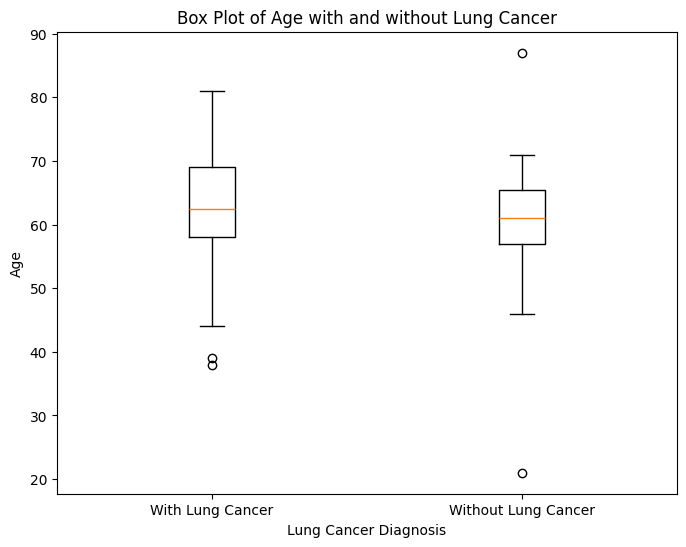

In [10]:
# Creating a box plot for age distribution with and without lung cancer
plt.figure(figsize=(8, 6))

plt.boxplot([with_lung_cancer['AGE'], without_lung_cancer['AGE']], labels=['With Lung Cancer', 'Without Lung Cancer'])

plt.xlabel('Lung Cancer Diagnosis')
plt.ylabel('Age')
plt.title('Box Plot of Age with and without Lung Cancer')
plt.show()

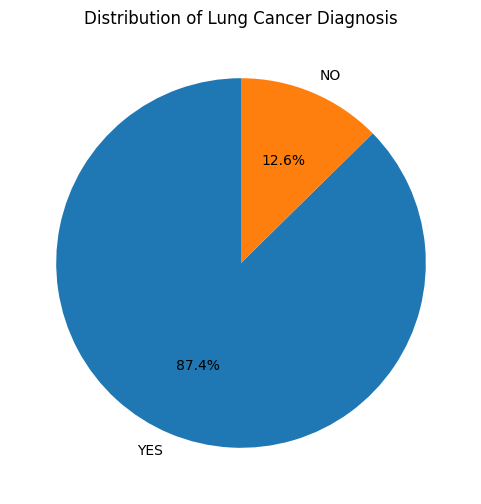

In [11]:
# Count the occurrences of 'YES' and 'NO' in 'LUNG_CANCER' column
lung_cancer_counts = df['LUNG_CANCER'].value_counts()

# Plotting a pie chart for lung cancer diagnosis distribution
plt.figure(figsize=(6, 6))

plt.pie(lung_cancer_counts, labels=lung_cancer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Lung Cancer Diagnosis')

plt.show()

### Adding Gender variable to add more contrast to the study subject (Ages and Lung Cancer)

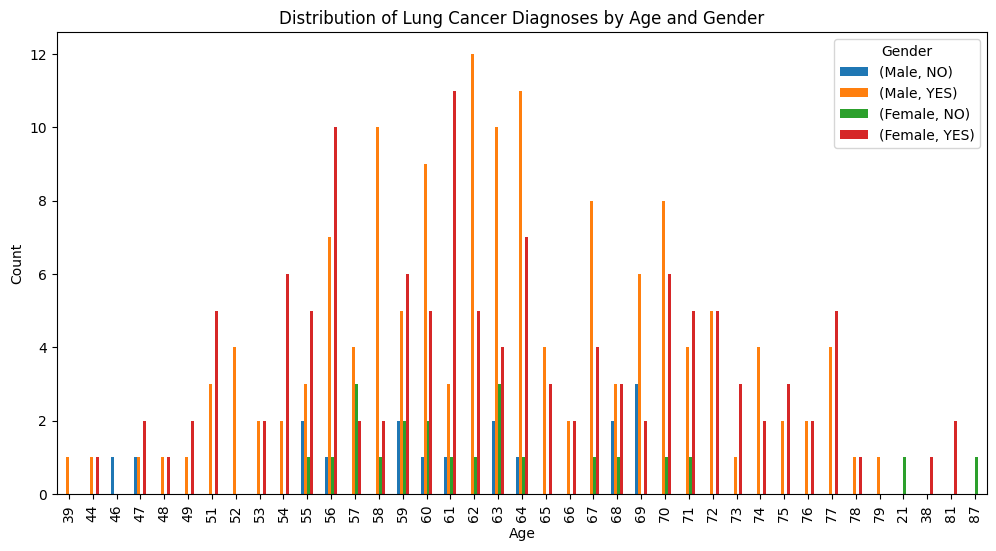

In [12]:
# Creating subsets for each gender
male_data = data[data['GENDER'] == 'M']
female_data = data[data['GENDER'] == 'F']

# Calculating the counts of lung cancer diagnoses for each age group by gender
male_counts = male_data.groupby('AGE')['LUNG_CANCER'].value_counts().unstack().fillna(0)
female_counts = female_data.groupby('AGE')['LUNG_CANCER'].value_counts().unstack().fillna(0)

# Combining counts from both genders
combined_counts = pd.concat([male_counts, female_counts], axis=1)
combined_counts.columns = pd.MultiIndex.from_product([['Male', 'Female'], ['NO', 'YES']])

# Plotting the bar plot
combined_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Lung Cancer Diagnoses by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

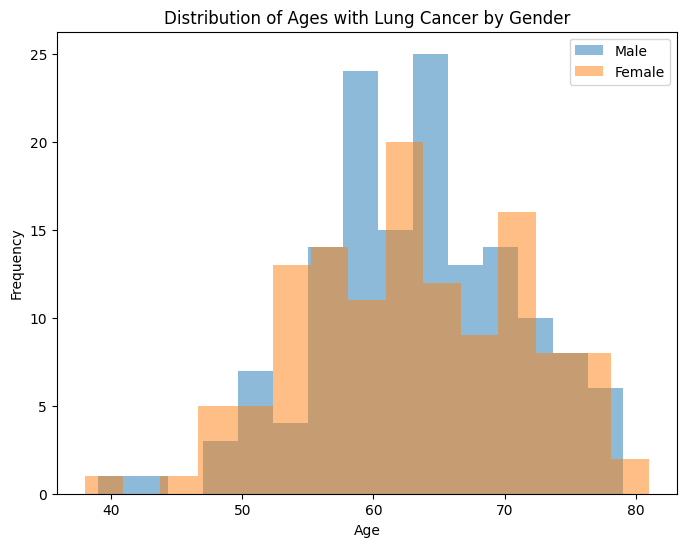

In [13]:
# Assuming 'male_data' and 'female_data' are filtered DataFrames based on gender
plt.figure(figsize=(8, 6))

# Histogram for male ages with lung cancer
plt.hist(male_data[male_data['LUNG_CANCER'] == 'YES']['AGE'], bins=15, alpha=0.5, label='Male')

# Histogram for female ages with lung cancer
plt.hist(female_data[female_data['LUNG_CANCER'] == 'YES']['AGE'], bins=15, alpha=0.5, label='Female')

plt.title('Distribution of Ages with Lung Cancer by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
# Filtering data for individuals with lung cancer
lung_cancer_data = df[df['LUNG_CANCER'] == 'YES']

# Grouping by gender and age range, and then counting occurrences
age_ranges = pd.cut(lung_cancer_data['AGE'], bins=[20, 30, 40, 50, 60, 70, 80, 90])
counts_by_gender_age = lung_cancer_data.groupby(['GENDER', age_ranges], observed=True).size().reset_index(name='COUNT')

print(counts_by_gender_age)

   GENDER       AGE  COUNT
0       F  (30, 40]      1
1       F  (40, 50]      6
2       F  (50, 60]     43
3       F  (60, 70]     47
4       F  (70, 80]     26
5       F  (80, 90]      2
6       M  (30, 40]      1
7       M  (40, 50]      4
8       M  (50, 60]     49
9       M  (60, 70]     67
10      M  (70, 80]     24
